In [2]:
# tensorflow.keras
from tensorflow.keras.datasets.mnist import load_data
#((x_train, y_train),(x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# reverse: _r
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[5])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 256 + 256(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()
print(Sequential)

In [ ]:
# 機率時 cross Entropy 較適合
# 一個神經元時(兩個機率): BinaryCrossEntropy
# 多個神經元 pi log(1/qi): CategoricalCrossEntropy
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

In [ ]:
x_train_shape = x_train.reshape(-1, 784) / 255.0
x_test_shape = x_test.reshape(-1, 784) /255.0

In [ ]:
# batch_size : 1.調整參數走向 2.看圖片大小決定數量(圖片大數量小<=>) 3.資料量決定數量(資料量大數量小<=>)
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_shape,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

In [ ]:
model.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0655 - accuracy: 0.9805


[0.06547220796346664, 0.9804999828338623]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_shape)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=[str(i) + "(預測)" for i in range(10)],
      index=[str(i) + "(正確)" for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),971,0,1,1,0,3,1,1,1,1
1(正確),0,1125,4,0,0,1,2,1,2,0
2(正確),4,1,1009,1,1,0,2,6,7,1
3(正確),0,0,2,988,0,4,0,4,4,8
4(正確),1,0,3,1,960,0,2,2,2,11
5(正確),2,0,0,7,1,871,4,2,4,1
6(正確),6,2,1,1,2,3,941,0,2,0
7(正確),0,3,9,0,1,0,0,1010,2,3
8(正確),5,1,3,3,3,2,1,5,947,4
9(正確),3,3,0,3,6,3,0,6,2,983


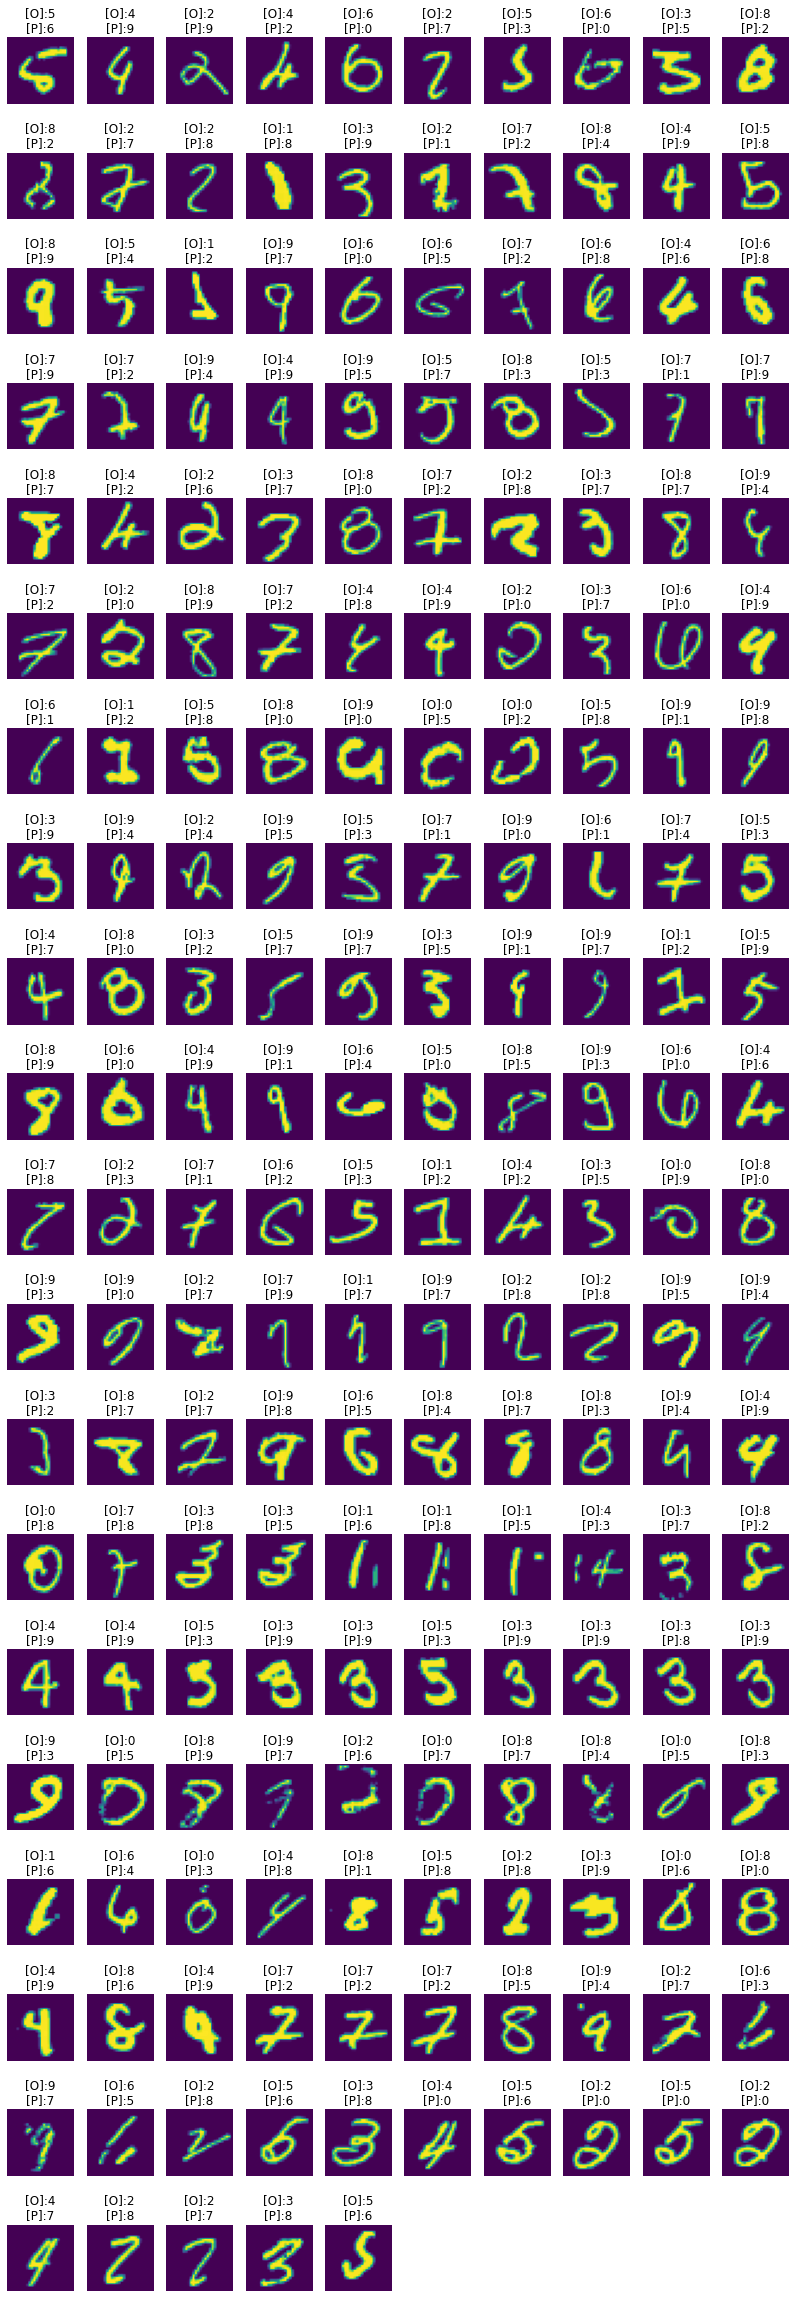

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
  plt.subplot(height, width, i+1)
  plt.imshow(false_img[i])
  t = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
  plt.title(t)
  plt.axis("off")

輸入檔名:test.jpg
0 的機率: 0.0
1 的機率: 0.0
2 的機率: 0.0
3 的機率: 0.0
4 的機率: 0.0
5 的機率: 0.0
6 的機率: 0.0
7 的機率: 0.0
8 的機率: 0.0
9 的機率: 1.0
答案: 9


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


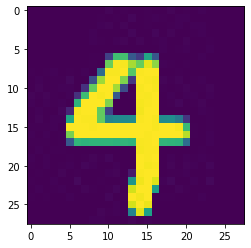

In [ ]:
# pillow
from PIL import Image
# RGB, RGBA, L(gray)
fn = input("輸入檔名:")
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 784) 
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(i, "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", ans)
plt.imshow(img_np)